# 1.3 模型选择

在之前多项式拟合的例子中，我们知道多项式的阶数 $M$ 的选择影响着我们拟合的效果，也决定了模型中参数的个数（模型复杂度）。我们还知道正则项参数 $\lambda$ 也可以控制模型的复杂度。这些参数的选择是我们所关心的问题。

## 验证集 

在最大似然的例子中我们看到，在训练集上的结果好不代表在测试的时候结果一定好，因为存在过拟合的现象。

如果我们的数据足够多，我们可以从训练数据中分出一小部分数据作为验证集（`validation set`），在训练过程中对验证集进行测试，选择在验证集上效果最好的模型作为我们的结果。最后再用测试集（`test set`）对模型进行最终的评估。

## 交叉验证

在很多情况下，训练和测试数据都是有限的，为了得到更好的模型，我们希望使用尽可能多的训练数据。但是如果验证集的数据很少，那么在测试集上的测评结果就有很大的不确定性。

一个解决这种问题的方法叫做交叉验证（cross-validation），我们将数据分成 $S$ 等份，每次使用 $S-1$ 份数据进行训练，剩下的一份作为验证集，重复 $S$ 次。下图是一个 $S = 4$ 的交叉验证的展示，粉红色的部分表示验证集。

当训练数据特别少时，一个合适的方法是使用留一法（leave-one-out），令 $S = N$ 即与训练数据的总数相等。

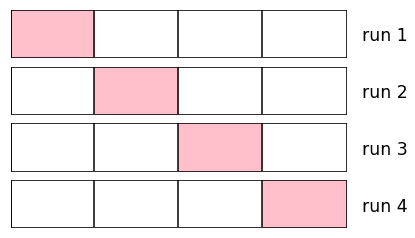

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(4, 1)
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(4):
        ax.plot([j,j], [0,1], color='black')
    ax.set_xlim(0,4)
    ax.set_xticks([])
    ax.set_ylim(0,1)
    ax.set_yticks([])
    ax.fill_between(np.linspace(i,i+1), 1, color="pink")
    ax.text(4.2, 0.35, "run {}".format(i+1), fontsize="xx-large")
    
plt.show()

## 信息量准则

交叉验证的一个主要缺点是训练次数会随着 $S$ 的增加而加大，对于一些计算很耗时的模型来说不是很适用。另一个深入的问题是对于每次的训练，我们可能会使用不同的超参来得到最好的效果。

因此，我们需要一个更好的方法来决定模型的复杂度。

历史上有一些信息量准则被人提出，用来衡量模型的复杂度，例如 `AIC (Akaike, 1974)`（`Akaike information criterion`）最大化：

$$
\ln p(\mathcal D|\mathbf w_{ML}) - M
$$

其中 $M$ 是模型中可变参数的数目。类似的准则还有 `BIC（Bayesian information criterion）` 等。这些准则没有考虑到模型参数的不确定性，但是在一些简单的模型上效果很好。